In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
df1 = pd.read_csv('election/raw/ArizGov.csv')
df1 = df1.dropna(axis=0).loc[:14]
df = pd.read_csv('t.csv')
df = df.loc[df.state =='Arizona']

In [7]:
ariz = df.merge(df1)
ariz.columns

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc', 'race name', 'candidate', 'votes',
       'demvote'],
      dtype='object')

In [8]:
ariz.shape

(13, 43)

In [21]:
ariz[['county', 'demvote']].groupby('county').agg(['mean', 'count'])

demvote      
            mean count
county                
Apache       1.0     1
Cochise      0.0     1
Coconino     1.0     1
Gila         0.0     1
Graham       0.0     1
Greenlee     0.0     1
Maricopa     0.0     1
Mohave       0.0     1
Navajo       0.0     1
Pima         1.0     1
Pinal        0.0     1
Yavapai      0.0     1
Yuma         0.0     1

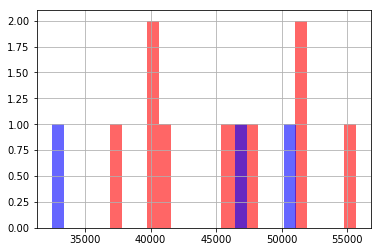

In [20]:
#ariz.loc[(ariz.demvote==0), 'median_hh_inc'].hist(bins=20, alpha=.6, color='red')
#ariz.loc[(ariz.demvote==1), 'median_hh_inc'].hist(bins=20, alpha=.6, color='blue')

In [23]:
features = (['median_hh_inc','total_population','black_pct'])

valid = ariz[features].notna().all(axis=1)
print(len(df), sum(valid))

15 13


In [32]:
dtree=DecisionTreeClassifier(
    criterion='entropy', 
    random_state=20181105, 
    max_depth=2,
    #min_samples_split=2, 
    #min_samples_leaf=1, 
    #max_features=None, 
    #max_leaf_nodes=None, 
)

dtree.fit(ariz[features], ariz['demvote'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=20181105, splitter='best')

In [33]:
pred_survival = dtree.predict(ariz[features])

print(confusion_matrix(ariz.demvote, pred_survival), '\n')
print('Accuracy:   %0.3f' % accuracy_score(ariz.demvote, pred_survival))
print('Precision:  %0.3f' % precision_score(ariz.demvote, pred_survival))
print('Recall:     %0.3f' % recall_score(ariz.demvote, pred_survival))

[[10  0]
 [ 2  1]] 

Accuracy:   0.846
Precision:  1.000
Recall:     0.333
